In [50]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib

In [1]:
!pip install ydata-profiling
!pip install pandas==1.5.3

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
  At

In [60]:
# Import necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.tree import DecisionTreeRegressor # Importing the DecisionTreeRegressor class
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation
import joblib  # For saving the trained model
from sklearn.impute import SimpleImputer

In [4]:
from ydata_profiling import ProfileReport

In [5]:
pd.__version__

'1.5.3'

In [6]:
# Step 1: Load the dataset
df = pd.read_csv("/content/solarpowergeneration.csv")  # Make sure the file is in the same

In [7]:
# Display first few rows
print(df.head())

   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89    

In [8]:
df.drop_duplicates(inplace=True)

In [13]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'float' object has no attribute 'ndim'

In [14]:
# Summary of dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 250.9 KB
None


In [15]:
# Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [16]:
# although the mean(temperature-1.304) close to median(temperature-1.0) it is better to fill with median because of the presence of outliers

df['temperature'] = df.temperature.fillna(df.temperature.median())

In [17]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [18]:
print(df.dtypes)

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object


In [19]:
'''
Replacing outliers with lower and upper bound values
'''

def fix_outliers(df1, col):
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    IQR = q3-q1
    le = q1-1.5*IQR
    ue = q3+1.5*IQR
    df1.loc[df1[col]<le, col] = le
    df1.loc[df1[col]>ue, col] = ue
    return df1

In [20]:
for i in df.columns:
    df = fix_outliers(df,i)

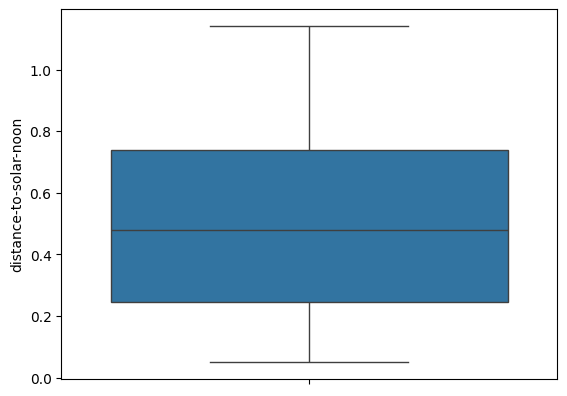

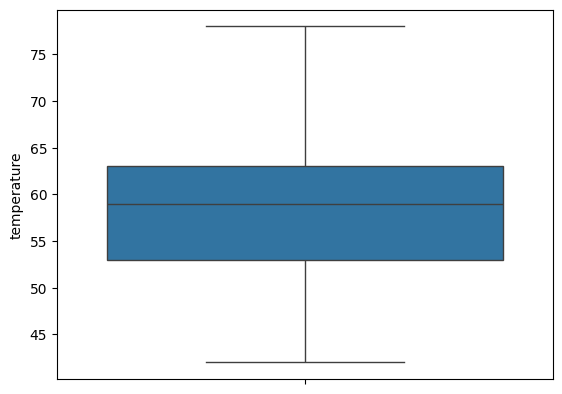

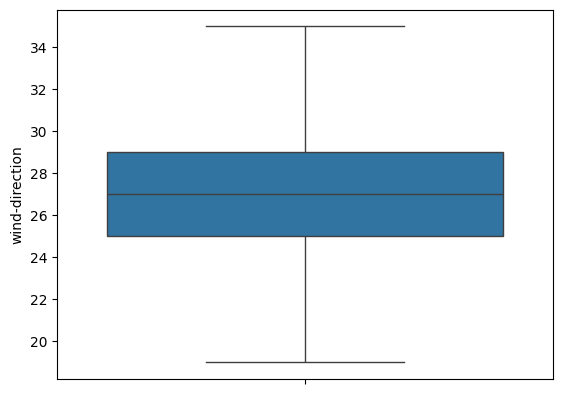

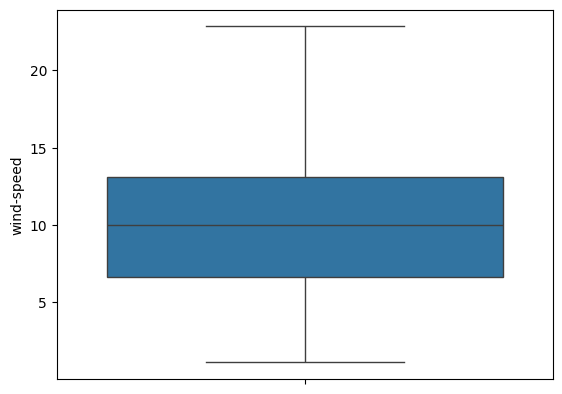

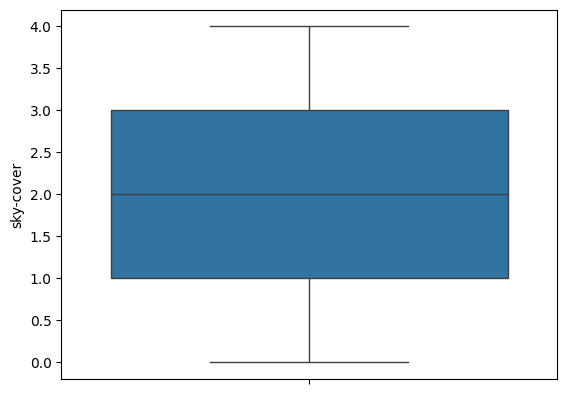

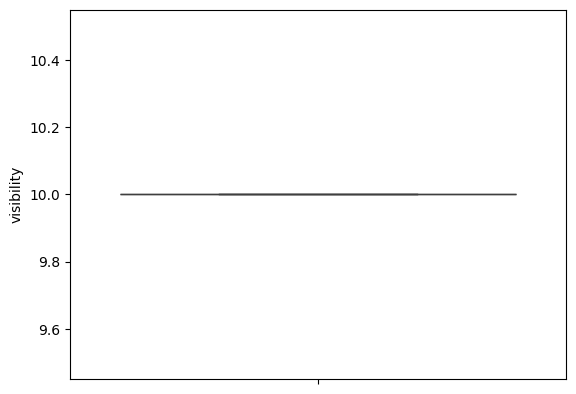

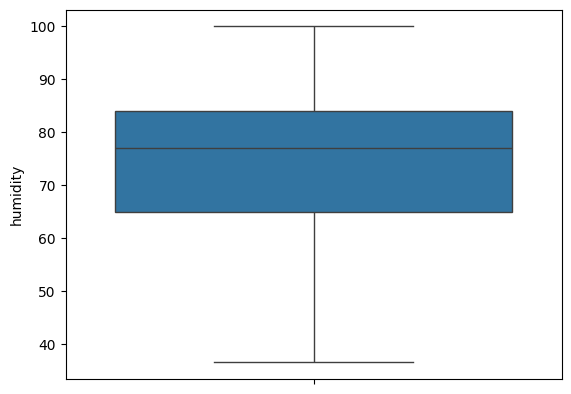

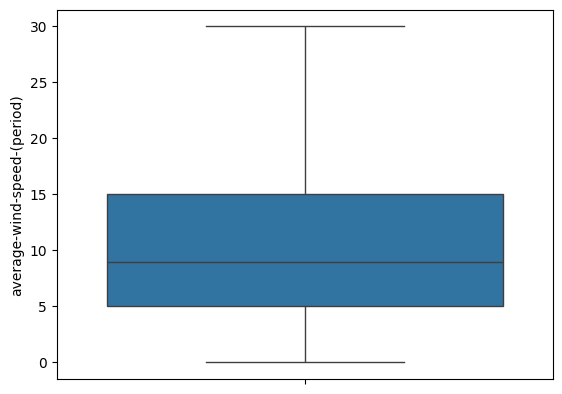

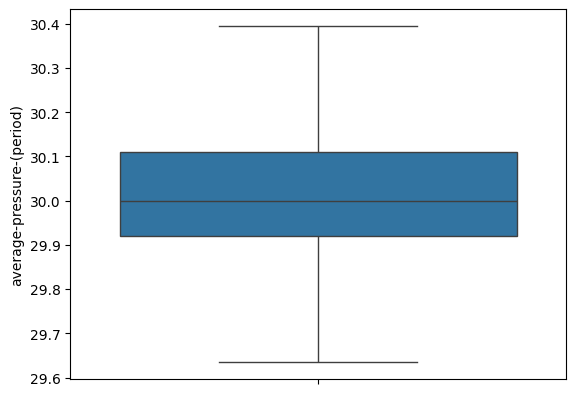

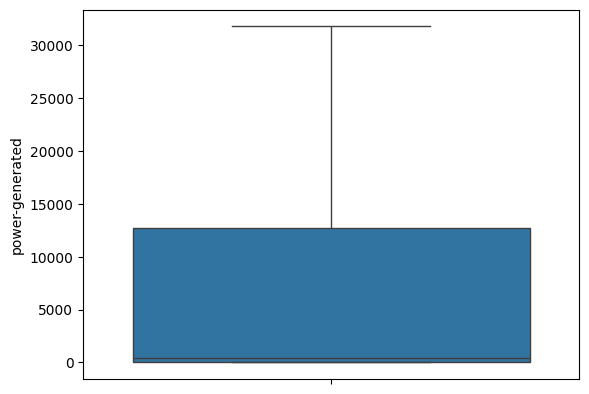

In [21]:
def boxplot(df,col):
    sns.boxplot(df[col])
    plt.show()


for i in df.columns:
    boxplot(df,i)

In [22]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,26.254795,10.073288,1.987671,10.0,73.733390,10.104830,30.017211,6909.688099
std,0.298024,6.841200,4.089209,4.768867,1.411978,0.0,14.435966,7.185583,0.139437,10132.725158
min,0.050401,42.000000,19.000000,1.100000,0.000000,10.0,36.500000,0.000000,29.635000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.0,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.0,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.0,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,35.000000,22.850000,4.000000,10.0,100.000000,30.000000,30.395000,31808.750000


In [23]:
# ===========================
# Step 2: Exploratory Data Analysis (EDA)
# ===========================

# Describe statistical summary
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       26.254795    10.073288   
std                  0.298024     6.841200        4.089209     4.768867   
min                  0.050401    42.000000       19.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       35.000000    22.850000   

         sky-cover  visibility     humidity  average-wind-speed-(period)  \
count  2920.000000      2920.0  2920.000000                  2919.000000   
mean      1.987671        10.0    73.733390                    10.104830   
std       1.411978         0.0    14.435966                     7.185583 

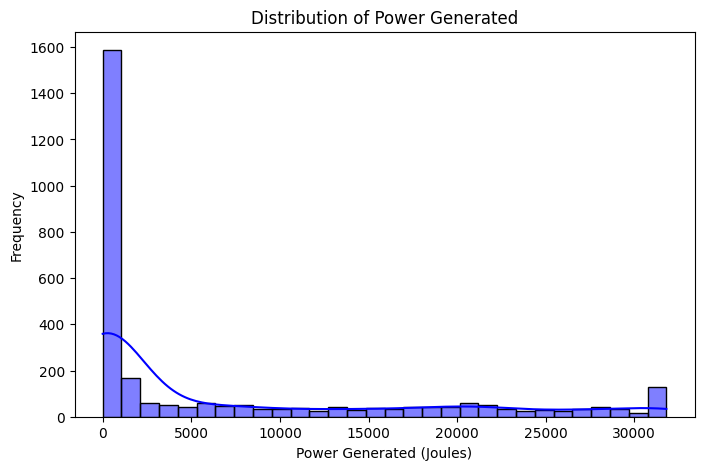

In [24]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['power-generated'], bins=30, kde=True, color='blue')
plt.title("Distribution of Power Generated")
plt.xlabel("Power Generated (Joules)")
plt.ylabel("Frequency")
plt.show()

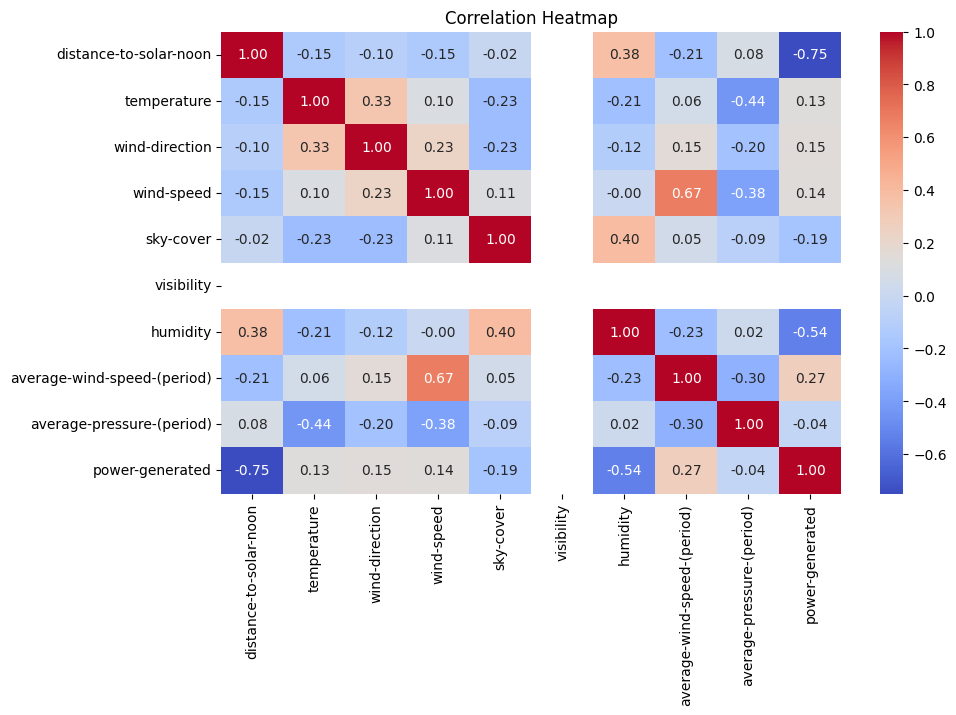

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

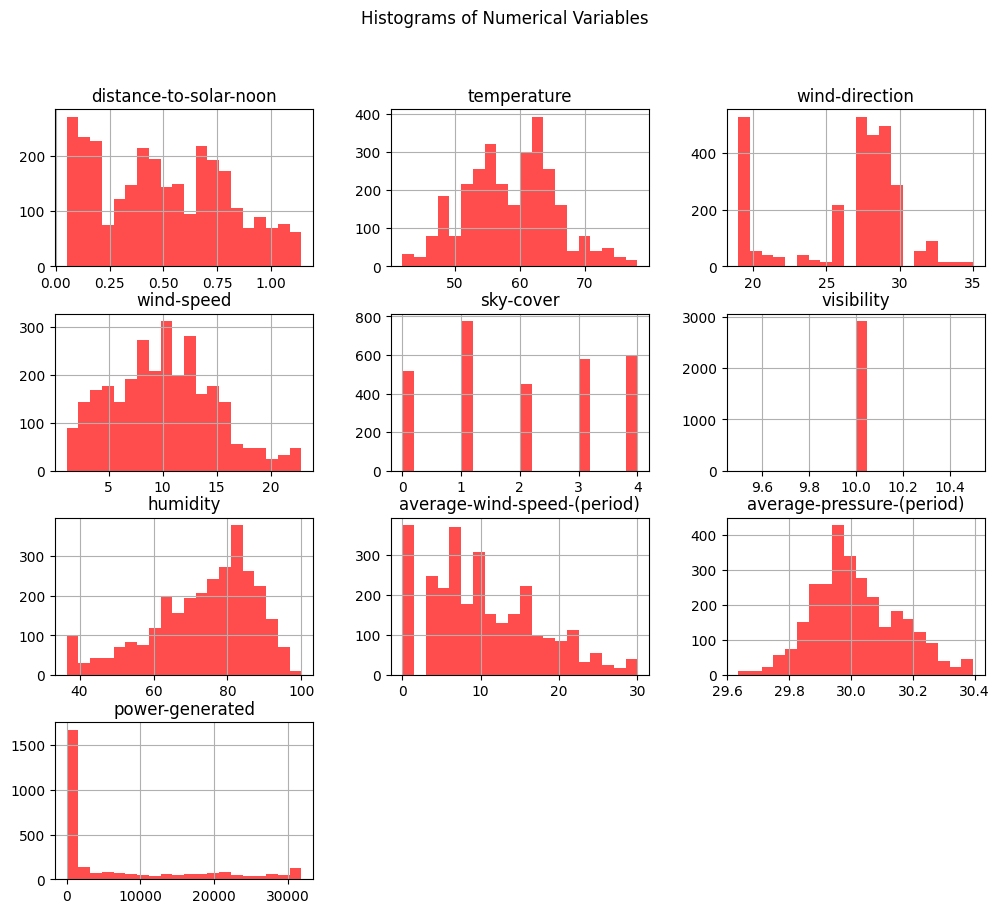

In [26]:
# Histograms
df.hist(figsize=(12, 10), bins=20, color='red', alpha=0.7)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

In [27]:
def histplot(df,col):
    sns.histplot(df[col])
    plt.show()

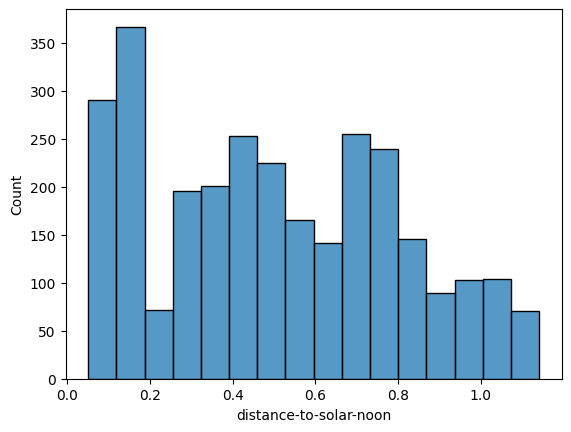

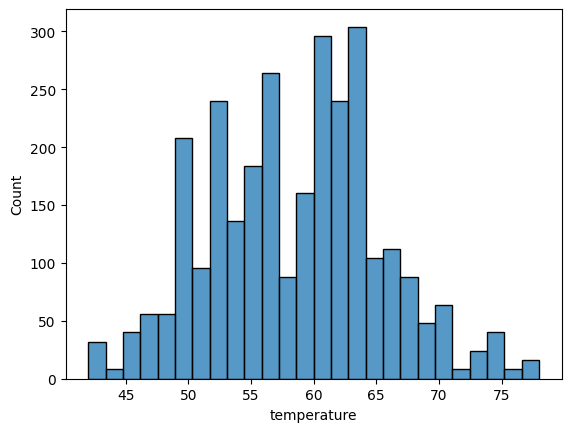

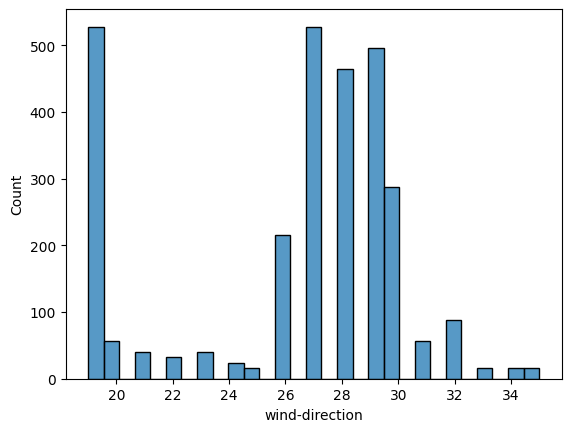

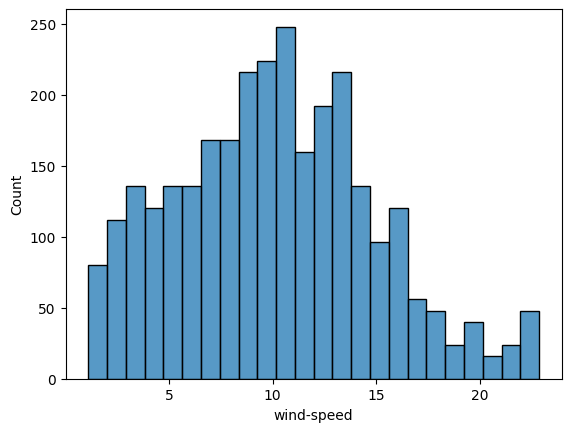

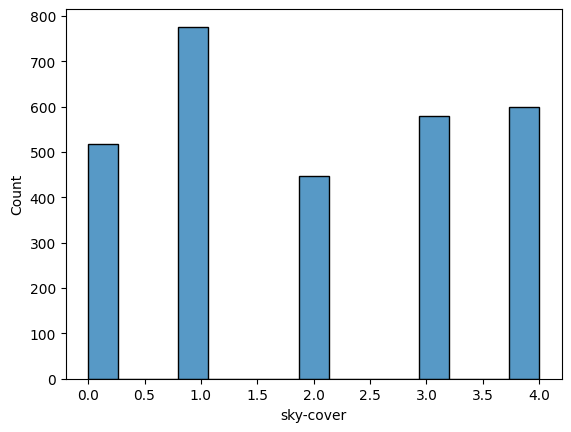

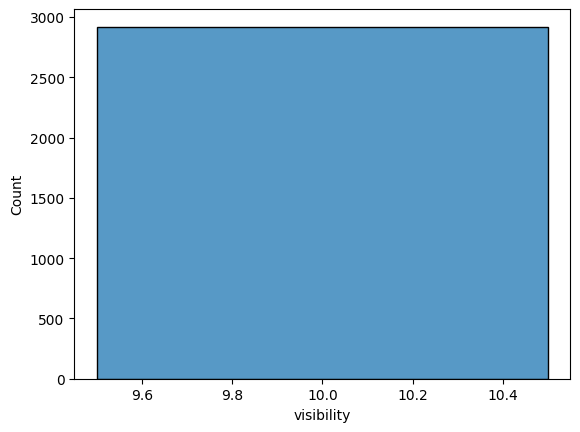

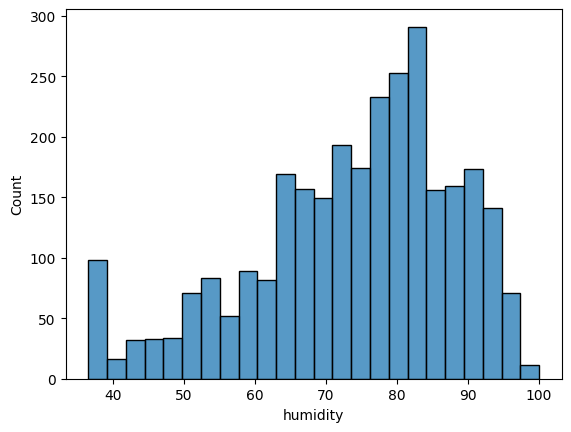

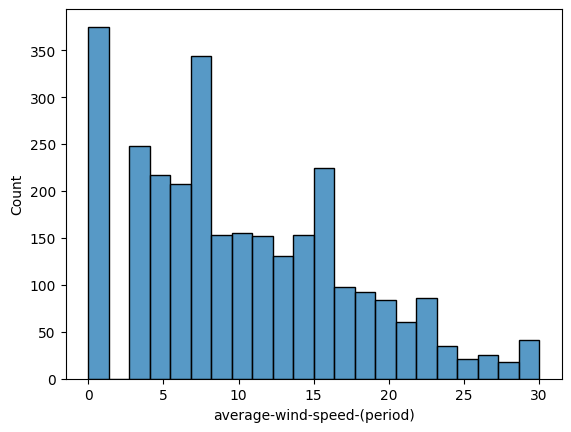

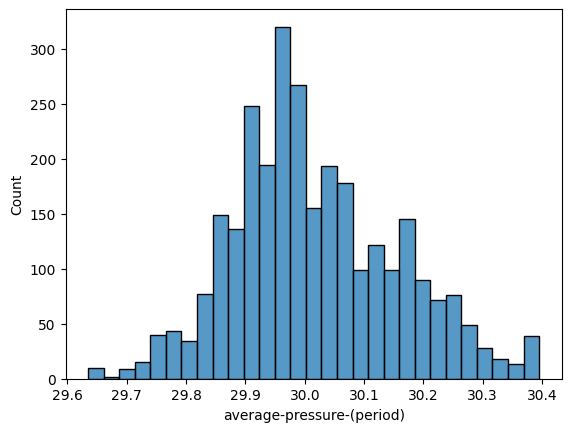

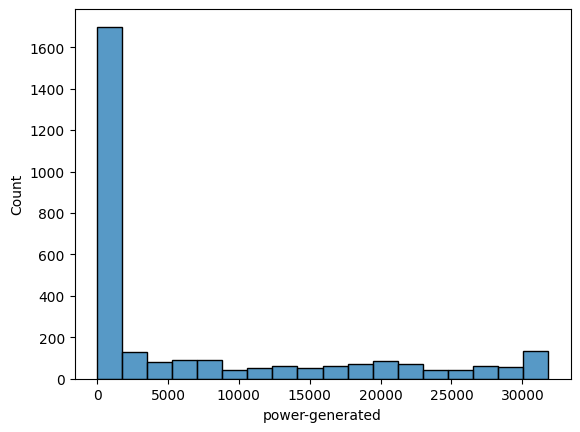

In [28]:
for i in df.columns:
    histplot(df,i)

In [29]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
print(df.corr())

                             distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.097004     0.333525   
wind-speed                                -0.146349     0.101800   
sky-cover                                 -0.015184    -0.230672   
visibility                                      NaN          NaN   
humidity                                   0.376702    -0.212216   
average-wind-speed-(period)               -0.214650     0.056532   
average-pressure-(period)                  0.083356    -0.439059   
power-generated                           -0.749567     0.133606   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.097004   -0.146349  -0.015184   
temperature                        0.333525    0.101800  -0.230672   
wind-direction                     1.0000

In [31]:
df.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.097004,-0.146349,-0.015184,NaN,0.376702,-0.214650,0.083356,-0.749567
temperature,-0.145207,1.000000,0.333525,0.101800,-0.230672,NaN,-0.212216,0.056532,-0.439059,0.133606
wind-direction,-0.097004,0.333525,1.000000,0.231166,-0.232814,NaN,-0.115949,0.154899,-0.200195,0.150843
wind-speed,-0.146349,0.101800,0.231166,1.000000,0.109523,NaN,-0.003255,0.672000,-0.384412,0.139647
sky-cover,-0.015184,-0.230672,-0.232814,0.109523,1.000000,NaN,0.396040,0.045516,-0.086107,-0.187133
visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,0.376702,-0.212216,-0.115949,-0.003255,0.396040,NaN,1.000000,-0.227000,0.022243,-0.536943
average-wind-speed-(period),-0.214650,0.056532,0.154899,0.672000,0.045516,NaN,-0.227000,1.000000,-0.295260,0.273689
average-pressure-(period),0.083356,-0.439059,-0.200195,-0.384412,-0.086107,NaN,0.022243,-0.295260,1.000000,-0.036538
power-generated,-0.749567,0.133606,0.150843,0.139647,-0.187133,NaN,-0.536943,0.273689,-0.036538,1.000000


<Axes: >

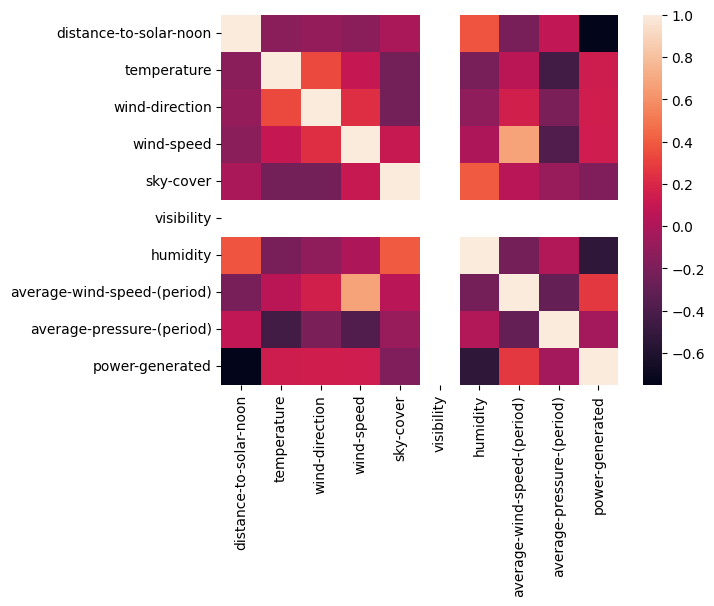

In [32]:
sns.heatmap(df.corr())

In [33]:
# Find strong correlations
correlations = df.corr().unstack().sort_values(ascending=False)
strong_corr = correlations[(correlations > 0.7) & (correlations < 1)]
print("Strong correlations:\n", strong_corr)

Strong correlations:
 Series([], dtype: float64)


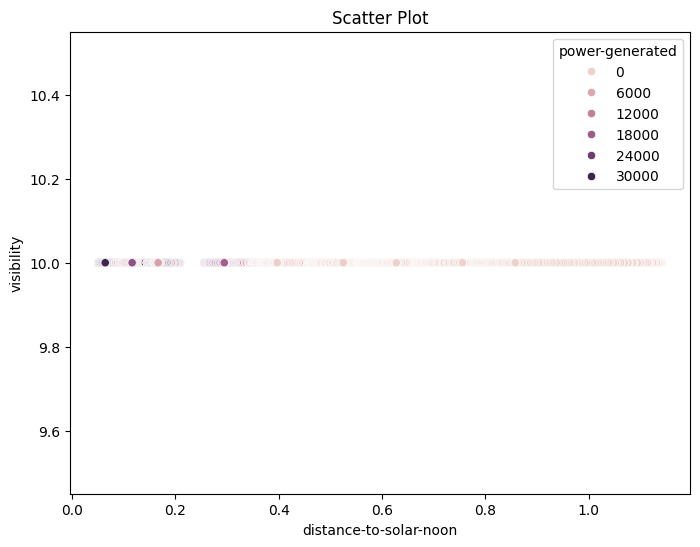

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance-to-solar-noon', y='visibility', data=df, hue='power-generated')
plt.title("Scatter Plot")
plt.show()

In [35]:

def stats_co(df, col):
    mean = df[col].mean()
    std = df[col].std()
    median = df[col].median()
    mode = df[col].mode()
    print("Column",col)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    print(f"    mean:{mean}, median:{median}, std:{std}, mode:{mode}, Inter Quartile Range:{IQR}")
    sns.kdeplot(df[col])
    plt.show()
    if median < mean:
        print("    This is RIGHT swewed distribution, so some data points with lower values are affect the mean")
    elif median > mean:
        print("    This is LEFT swewed distribution, so some data points with higher value are affect the mean")
    else:
        print("\n    The distribution is symmetric, with the mean and median being equal")
    print("_________________________________________________________________________________________________________________")

In [36]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

Column distance-to-solar-noon
    mean:0.5032940280626712, median:0.47895689650000006, std:0.298023544001734, mode:0     0.054115
1     0.055242
2     0.147689
3     0.148816
4     0.166667
5     0.257046
6     0.258174
7     0.350620
8     0.351747
9     0.459977
10    0.461105
11    0.553551
12    0.554679
13    0.662909
14    0.664036
15    0.756483
16    0.757610
Name: distance-to-solar-noon, dtype: float64, Inter Quartile Range:0.49581353274999995


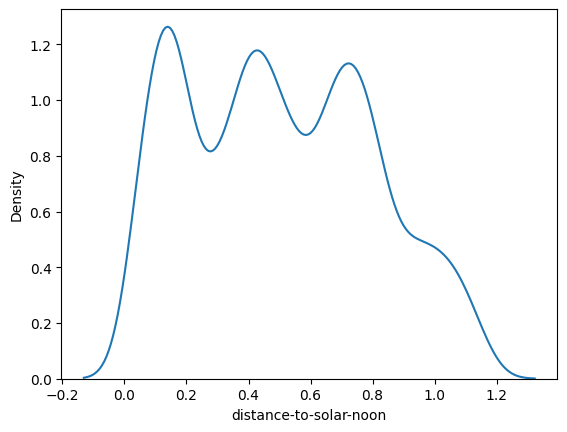

    This is RIGHT swewed distribution, so some data points with lower values are affect the mean
_________________________________________________________________________________________________________________
Column temperature
    mean:58.46849315068493, median:59.0, std:6.84120031203902, mode:0    62
Name: temperature, dtype: int64, Inter Quartile Range:10.0


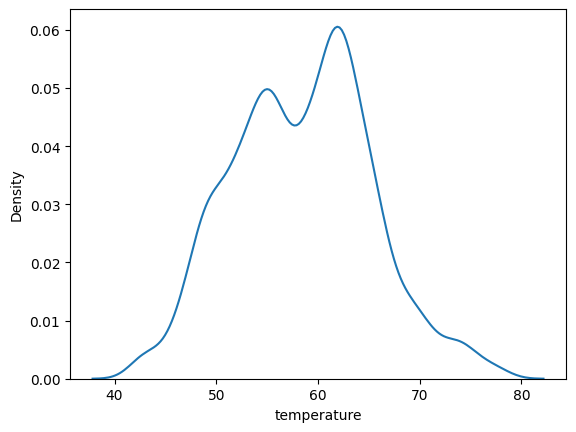

    This is LEFT swewed distribution, so some data points with higher value are affect the mean
_________________________________________________________________________________________________________________
Column wind-direction
    mean:26.254794520547946, median:27.0, std:4.089208756608689, mode:0    19
1    27
Name: wind-direction, dtype: int64, Inter Quartile Range:4.0


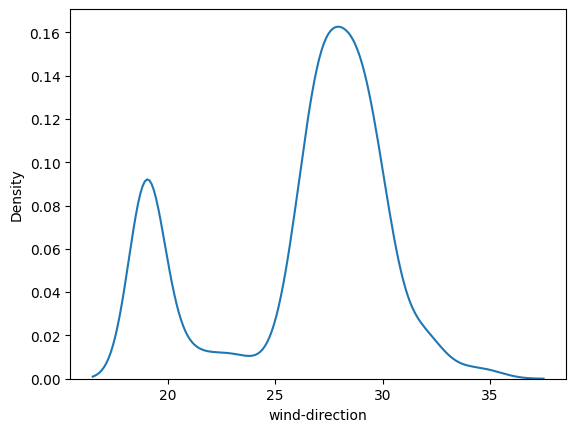

    This is LEFT swewed distribution, so some data points with higher value are affect the mean
_________________________________________________________________________________________________________________
Column wind-speed
    mean:10.073287671232876, median:10.0, std:4.768867306632539, mode:0    8.6
Name: wind-speed, dtype: float64, Inter Quartile Range:6.5


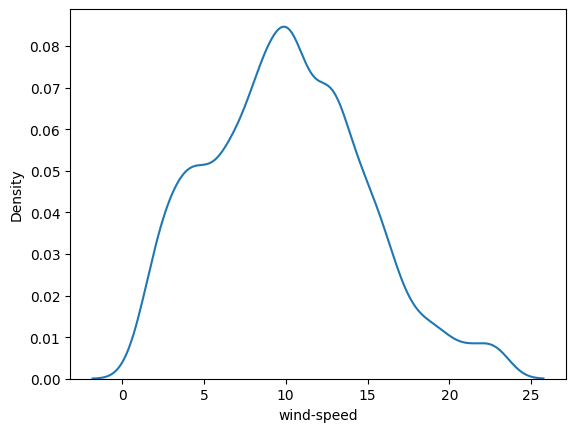

    This is RIGHT swewed distribution, so some data points with lower values are affect the mean
_________________________________________________________________________________________________________________
Column sky-cover
    mean:1.9876712328767123, median:2.0, std:1.4119778518284019, mode:0    1
Name: sky-cover, dtype: int64, Inter Quartile Range:2.0


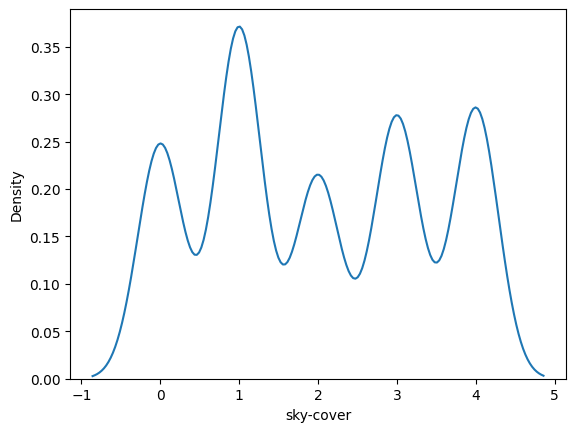

    This is LEFT swewed distribution, so some data points with higher value are affect the mean
_________________________________________________________________________________________________________________
Column visibility
    mean:10.0, median:10.0, std:0.0, mode:0    10.0
Name: visibility, dtype: float64, Inter Quartile Range:0.0


<ipython-input-35-ca6398ecfca5>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


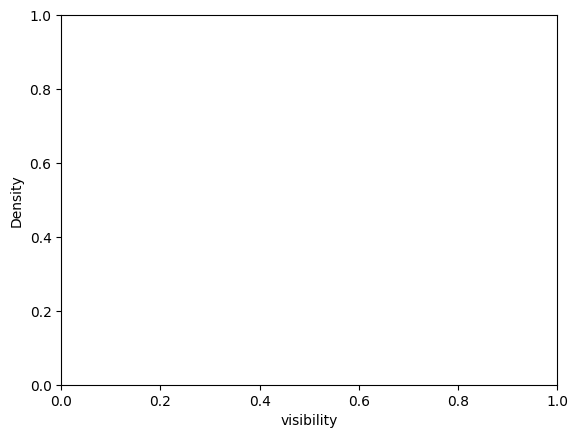


    The distribution is symmetric, with the mean and median being equal
_________________________________________________________________________________________________________________
Column humidity
    mean:73.7333904109589, median:77.0, std:14.435966209286489, mode:0    83.0
Name: humidity, dtype: float64, Inter Quartile Range:19.0


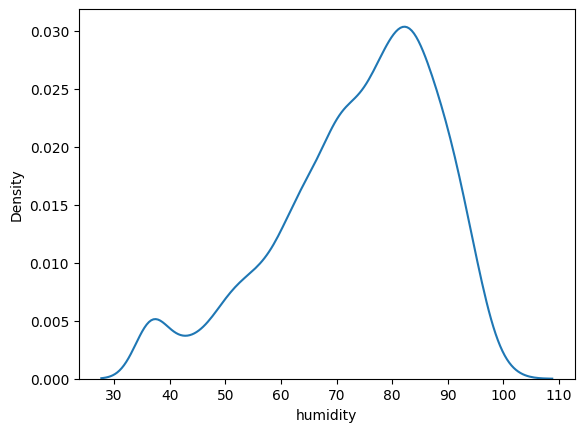

    This is LEFT swewed distribution, so some data points with higher value are affect the mean
_________________________________________________________________________________________________________________
Column average-wind-speed-(period)
    mean:10.104830421377184, median:9.0, std:7.185582670716664, mode:0    0.0
Name: average-wind-speed-(period), dtype: float64, Inter Quartile Range:10.0


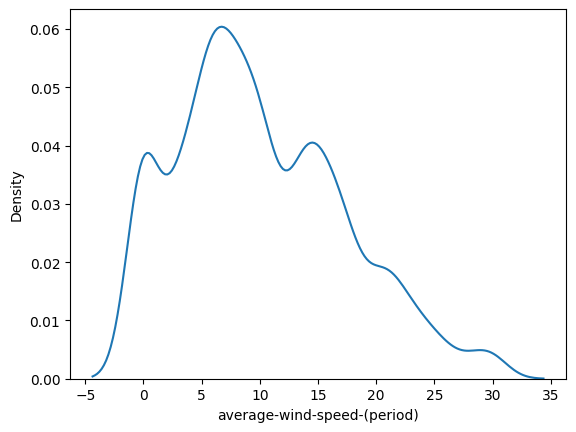

    This is RIGHT swewed distribution, so some data points with lower values are affect the mean
_________________________________________________________________________________________________________________
Column average-pressure-(period)
    mean:30.01721061643836, median:30.0, std:0.1394367314583374, mode:0    29.97
Name: average-pressure-(period), dtype: float64, Inter Quartile Range:0.18999999999999773


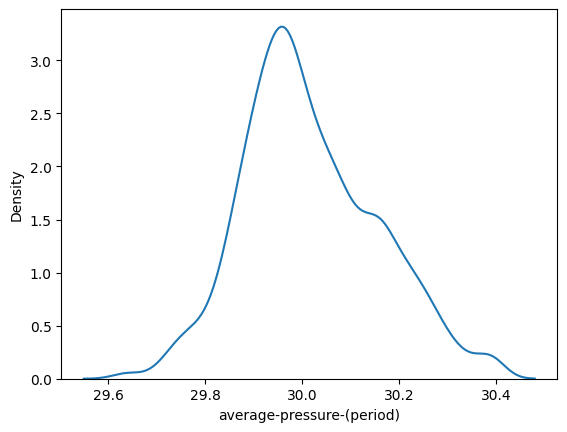

    This is RIGHT swewed distribution, so some data points with lower values are affect the mean
_________________________________________________________________________________________________________________
Column power-generated
    mean:6909.688099315069, median:404.0, std:10132.725157708615, mode:0    0.0
Name: power-generated, dtype: float64, Inter Quartile Range:12723.5


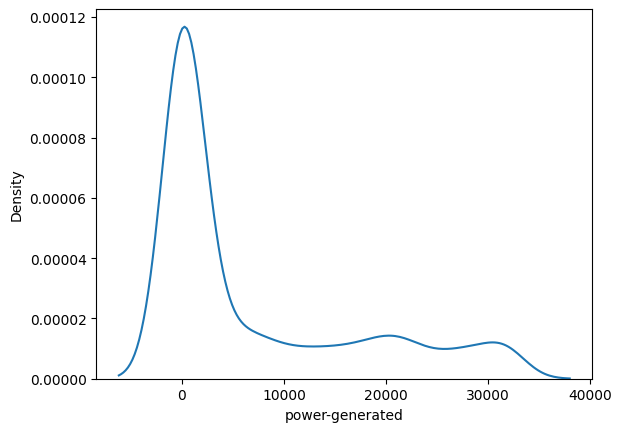

    This is RIGHT swewed distribution, so some data points with lower values are affect the mean
_________________________________________________________________________________________________________________


In [37]:
for i in df.columns:
    stats_co(df,i)

In [38]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers.shape[0]

# Check outliers for each numerical column
outlier_summary = {col: detect_outliers_iqr(df, col) for col in df.columns}
outlier_summary

{'distance-to-solar-noon': (-0.5000063228749999, 1.4832478081249998, 0),
 'temperature': (38.0, 78.0, 0),
 'wind-direction': (19.0, 35.0, 0),
 'wind-speed': (-3.1500000000000004, 22.85, 0),
 'sky-cover': (-2.0, 6.0, 0),
 'visibility': (10.0, 10.0, 0),
 'humidity': (36.5, 112.5, 0),
 'average-wind-speed-(period)': (-10.0, 30.0, 0),
 'average-pressure-(period)': (29.635000000000005, 30.394999999999996, 0),
 'power-generated': (-19085.25, 31808.75, 0)}

In [39]:
# Check outliers for each numerical column
outlier_summary = {col: detect_outliers_iqr(df, col) for col in df.columns}
outlier_summary

# visibility
lower_boundary, upper_boundary, outliers = detect_outliers_iqr(df,'visibility')

df['visibility'] = df['visibility'].clip(lower=lower_boundary, upper=upper_boundary)

# average_wind_speed_period
lower_boundary, upper_boundary, outliers = detect_outliers_iqr(df,'average-wind-speed-(period)')

df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].clip(lower=lower_boundary, upper=upper_boundary)

# average_pressure_period
lower_boundary, upper_boundary, outliers = detect_outliers_iqr(df,'average-pressure-(period)')

df['average-pressure-(period)'] = df['average-pressure-(period)'].clip(lower=lower_boundary, upper=upper_boundary)

# wind_direction_yj
lower_boundary, upper_boundary, outliers = detect_outliers_iqr(df,'wind-direction')

df['wind-direction'] = df['wind-direction'].clip(lower=lower_boundary, upper=upper_boundary)

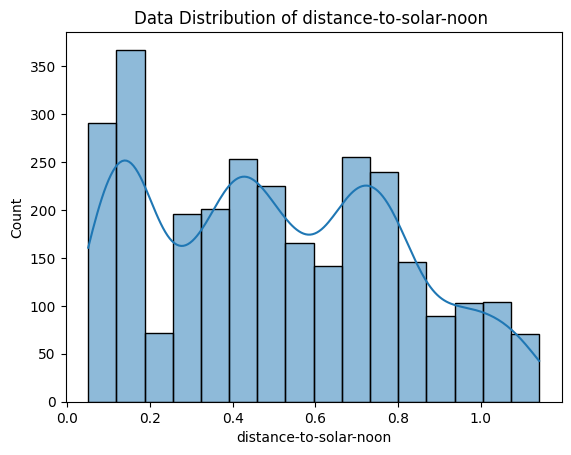

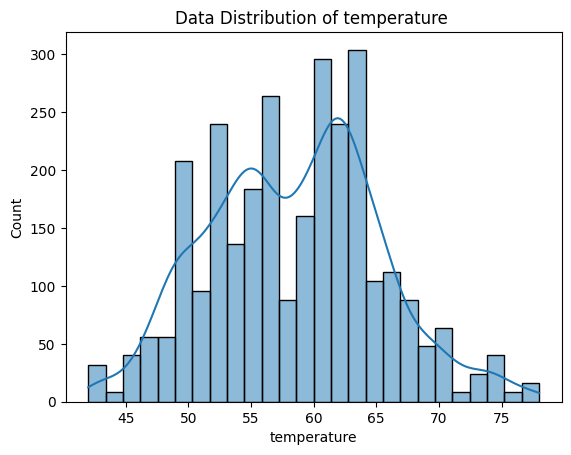

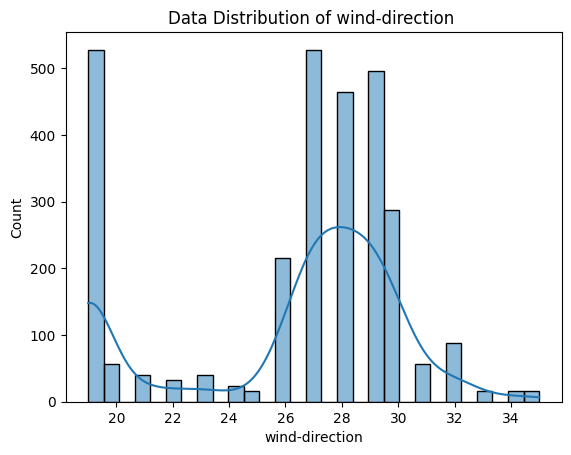

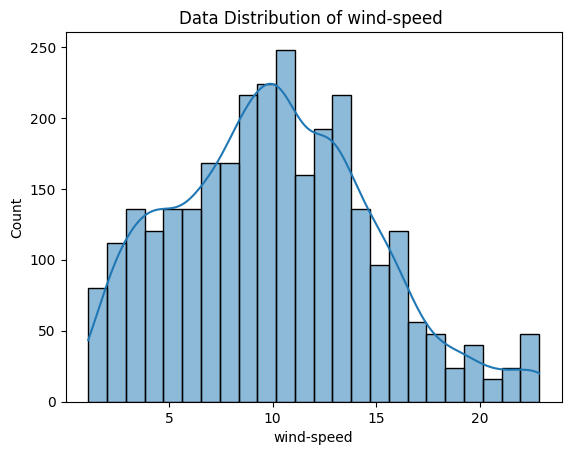

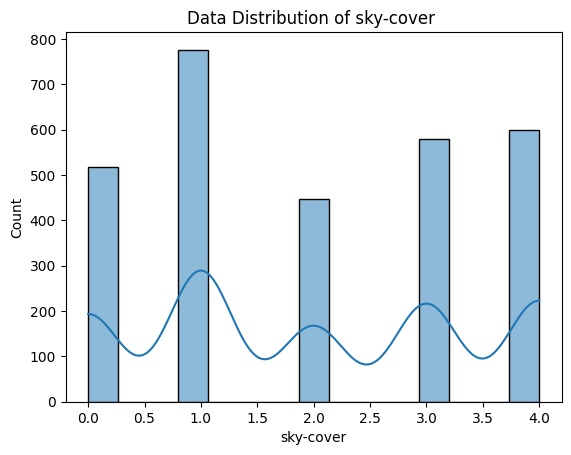

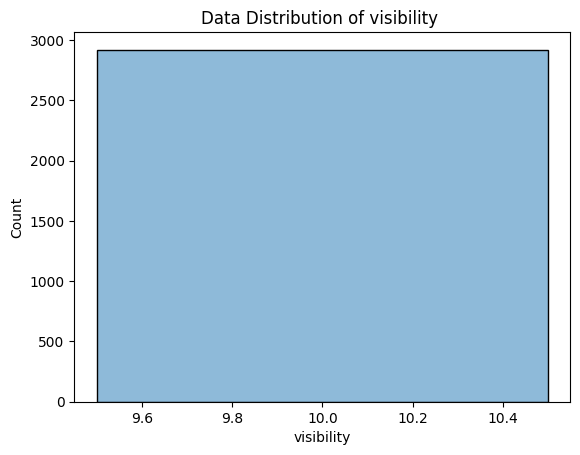

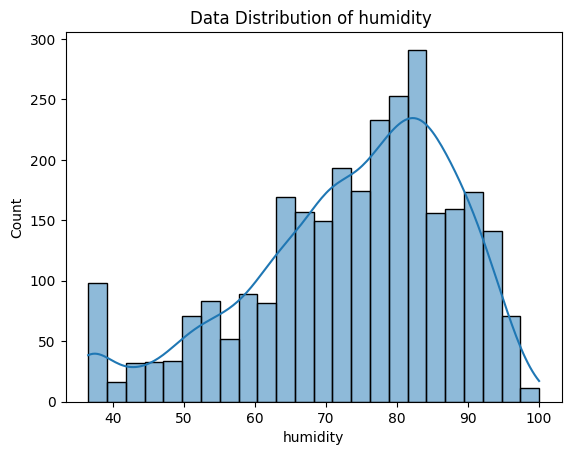

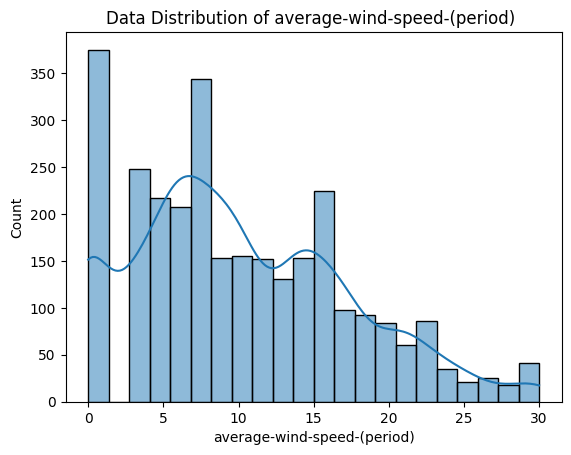

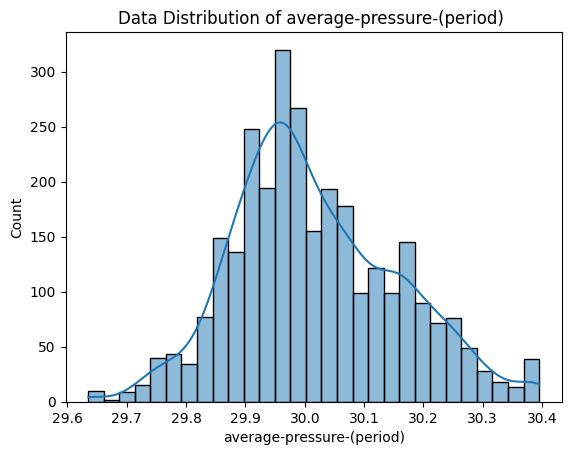

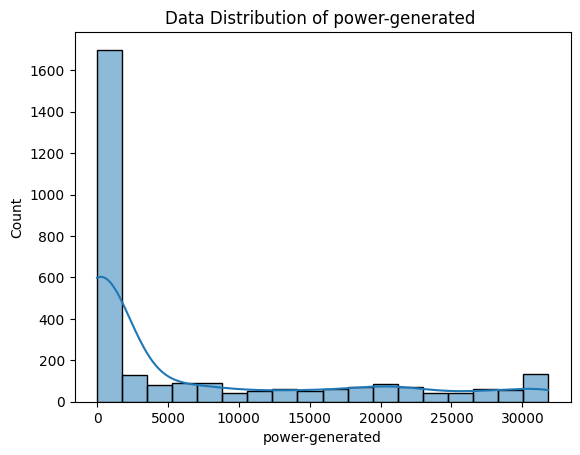

In [40]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.title(f'Data Distribution of {col} ')
    plt.show()

In [41]:
df.skew()

,0
distance-to-solar-noon,0.211452
temperature,0.125916
wind-direction,-0.759444
wind-speed,0.320330
sky-cover,0.080284
visibility,0.000000
humidity,-0.725126
average-wind-speed-(period),0.551815
average-pressure-(period),0.368321
power-generated,1.260141


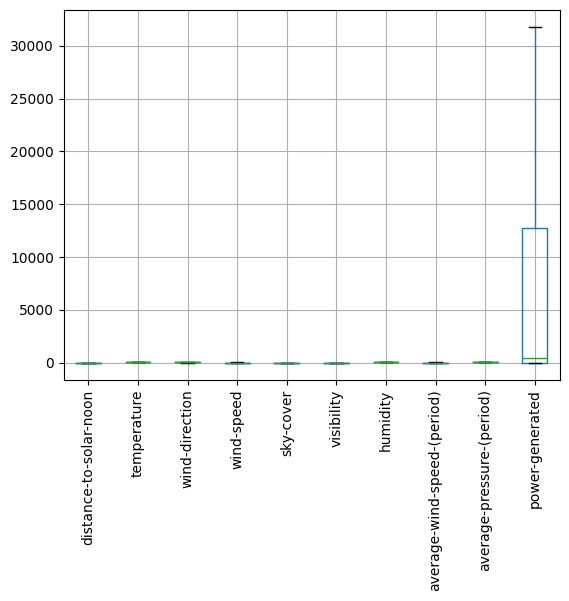

In [42]:
# box-plot
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [43]:
# Iterate through each column and print the description of the column
for col in df.columns:
    print(f"Statistics for column '{col}':")
    print(df[col].describe()) #This is the first option using describe
# %%

Statistics for column 'distance-to-solar-noon':
count    2920.000000
mean        0.503294
std         0.298024
min         0.050401
25%         0.243714
50%         0.478957
75%         0.739528
max         1.141361
Name: distance-to-solar-noon, dtype: float64
Statistics for column 'temperature':
count    2920.000000
mean       58.468493
std         6.841200
min        42.000000
25%        53.000000
50%        59.000000
75%        63.000000
max        78.000000
Name: temperature, dtype: float64
Statistics for column 'wind-direction':
count    2920.000000
mean       26.254795
std         4.089209
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        35.000000
Name: wind-direction, dtype: float64
Statistics for column 'wind-speed':
count    2920.000000
mean       10.073288
std         4.768867
min         1.100000
25%         6.600000
50%        10.000000
75%        13.100000
max        22.850000
Name: wind-speed, dtype: float64
Statistics for col

<Axes: xlabel='power-generated', ylabel='Count'>

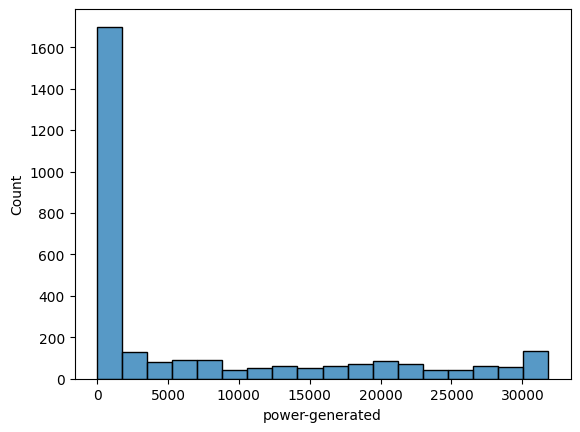

In [44]:
sns.histplot(df[col]) # The second option is to use sns.histplot()
    #plt.show()

In [45]:
!pip install ppscore
import ppscore as pps

In [46]:
pps_matrix=pps.matrix(df)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,distance-to-solar-noon,distance-to-solar-noon,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,distance-to-solar-noon,temperature,0.000000,regression,True,mean absolute error,5.605479,6.215753,DecisionTreeRegressor()
2,distance-to-solar-noon,wind-direction,0.000000,regression,True,mean absolute error,3.019178,4.086901,DecisionTreeRegressor()
3,distance-to-solar-noon,wind-speed,0.000000,regression,True,mean absolute error,3.831644,4.595559,DecisionTreeRegressor()
4,distance-to-solar-noon,sky-cover,0.000000,regression,True,mean absolute error,1.228767,1.450000,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
95,power-generated,visibility,0.000000,target_is_constant,True,None,1.000000,1.000000,None
96,power-generated,humidity,0.046178,regression,True,mean absolute error,11.464555,10.935147,DecisionTreeRegressor()
97,power-generated,average-wind-speed-(period),0.000000,regression,True,mean absolute error,5.805755,6.368202,DecisionTreeRegressor()
98,power-generated,average-pressure-(period),0.000000,regression,True,mean absolute error,0.110717,0.133800,DecisionTreeRegressor()


In [47]:
# ===========================
# Step 3: Preprocessing the Data
# ===========================

# Define features (X) and target variable (y)
X = df.drop(columns=['power-generated'])  # Independent variables
y = df['power-generated']  # Target variable

In [48]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Standardize the feature values for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Now we will scale or normalize the data

X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.8234681 ,  0.8191549 ,  0.68124952, ..., -1.04463087,
         1.50878749, -1.13255706],
       [-0.14434309,  0.5267203 ,  0.19219025, ..., -0.1350138 ,
         1.09238782, -0.34493649],
       [ 0.53293065,  1.25780681,  0.68124952, ..., -0.1350138 ,
         0.39838838, -1.92017762],
       ...,
       [-0.11786086,  0.8191549 , -0.05233939, ..., -0.1350138 ,
         0.1207886 , -0.48814023],
       [-0.21588416, -0.35058353, -1.76404685, ...,  0.63466219,
        -0.71201074,  0.94389716],
       [ 0.93305302,  0.5267203 ,  0.92577915, ...,  0.91454437,
         0.67598816,  0.72909156]])

In [51]:
# Check for NaN values in X_train_scaled
if np.isnan(X_train_scaled).any():
    print("NaN values found in X_train_scaled. Imputing with the mean.")
    # Impute NaN values with the mean
    imputer = SimpleImputer(strategy='mean') #Use SimpleImputer to fill NaNs with the mean.
    X_train_scaled = imputer.fit_transform(X_train_scaled) #fit and transform the data.

NaN values found in X_train_scaled. Imputing with the mean.


In [52]:
# Check for NaN values in X_test_scaled
if np.isnan(X_test_scaled).any():
    print("NaN values found in X_test_scaled. Imputing with the mean.")
    # Impute NaN values with the mean
    imputer = SimpleImputer(strategy='mean') #Use SimpleImputer to fill NaNs with the mean.
    X_test_scaled = imputer.fit_transform(X_test_scaled) #fit and transform the data.

In [53]:
# Save the scaler for future use in deployment
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [82]:
# ===========================
# Step 4: Model Building (Corrected)
# ===========================

# Ensure X_train_scaled is not empty before fitting the model
if X_train_scaled.shape[0] == 0:
    raise ValueError("Error: X_train_scaled is empty. Check data preprocessing!")
else:
    print(f"X_train_scaled shape: {X_train_scaled.shape}")  # Debugging

X_train_scaled shape: (2336, 9)


In [83]:
# Initialize and Train Linear Regression Model
lr_model = LinearRegression() # Corrected: LinearRegression takes no argument during initialization.
lr_model.fit(X_train_scaled, y_train)  # Corrected: Use the lr_model instance
# Initialize and Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)  # Corrected: Use the rf_model instance
# Initialize and Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
print("\nModel training completed successfully!")


Model training completed successfully!


In [84]:
# ===========================
# Step 5: Model Evaluation
# ===========================

# Predict on test data
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
# Define function to calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel Performance: {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R-squared (R²): {r2_score(y_true, y_pred):.4f}")

In [86]:
# Evaluate Linear Regression
evaluate_model(y_test, lr_predictions, "Linear Regression")

# Evaluate Random Forest
evaluate_model(y_test, rf_predictions, "Random Forest")

# Evaluate Decision Tree
evaluate_model(y_test, dt_predictions, "Decision Tree")


Model Performance: Linear Regression
Mean Absolute Error (MAE): 4872.9788
Mean Squared Error (MSE): 37383483.8232
Root Mean Squared Error (RMSE): 6114.2034
R-squared (R²): 0.6324

Model Performance: Random Forest
Mean Absolute Error (MAE): 1526.6500
Mean Squared Error (MSE): 11431850.7556
Root Mean Squared Error (RMSE): 3381.1020
R-squared (R²): 0.8876

Model Performance: Decision Tree
Mean Absolute Error (MAE): 1897.2851
Mean Squared Error (MSE): 18717604.3624
Root Mean Squared Error (RMSE): 4326.3847
R-squared (R²): 0.8160


In [66]:
#Residual Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8,5))
    sns.pairplot(df)
    sns.boxplot(df)

    sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
    plt.axhline(y=0, color="r", linestyle="--")
    sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
    plt.axhline(y=0, color="r", linestyle="--")
    plt.xlabel("Actual Power Generated")
    plt.ylabel("Residuals (Error)")
    plt.title(f"Residual Plot - {model_name}")
    plt.show()

# Plot residuals for all models
plot_residuals(y_test, lr_predictions, "Linear Regression")
plot_residuals(y_test, dt_predictions, "Decision Tree")
plot_residuals(y_test, rf_predictions, "Random Forest")

Output hidden; open in https://colab.research.google.com to view.

In [67]:
# pair-plot
sns.pairplot(df,diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

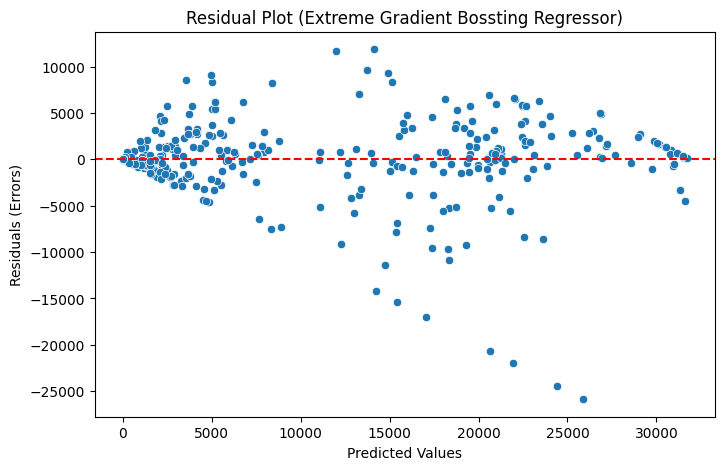

In [71]:
# Residual Plot
residuals = y_test - rf_predictions

plt.figure(figsize=(8,5))
sns.scatterplot(x=rf_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot (Extreme Gradient Bossting Regressor)")
plt.show()

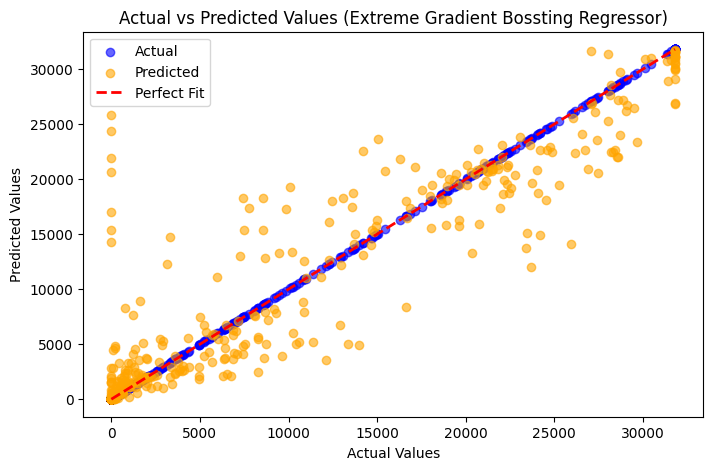

In [74]:
  # actual vs predicted
plt.figure(figsize=(8, 5))

# Assuming you want to plot predictions from the Random Forest model:
y_predictions = rf_model.predict(X_test_scaled)

# Plot actual values in blue and predicted values in orange
plt.scatter(y_test, y_test, color='blue', label="Actual", alpha=0.6)
plt.scatter(y_test, y_predictions, color='orange', label="Predicted", alpha=0.6)

# Add a 45-degree reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Extreme Gradient Bossting Regressor)")

plt.legend()
plt.show()

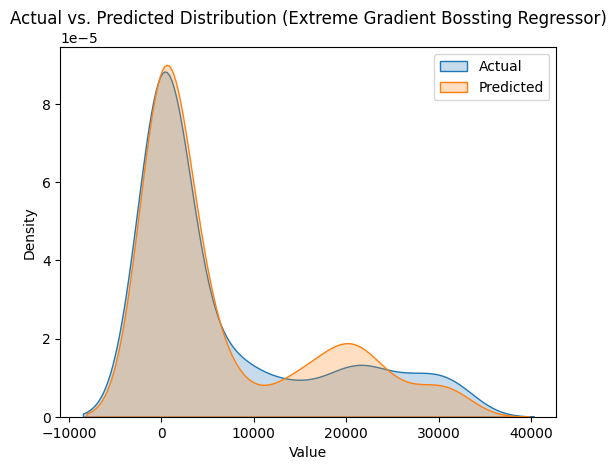

In [77]:
# actual vs predicted distribution
sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(y_predictions, label="Predicted", fill=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Actual vs. Predicted Distribution (Extreme Gradient Bossting Regressor)")
plt.legend()
plt.show()

In [96]:
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
# Initialize and Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)  # Create a GBR model instance
gbr_model.fit(X_train_scaled, y_train)  # Train the GBR model


GradientBoostingRegressor(random_state=42)

In [99]:
!pip install xgboost


In [101]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state=42)
xgbr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [102]:
# Extract feature importance
# Assuming 'rf_model' is your trained Random Forest model
rf_feature_importances_ = rf_model.feature_importances_
gbr_feature_importances_ = gbr_model.feature_importances_
xgbr_feature_importances_ = xgbr.feature_importances_

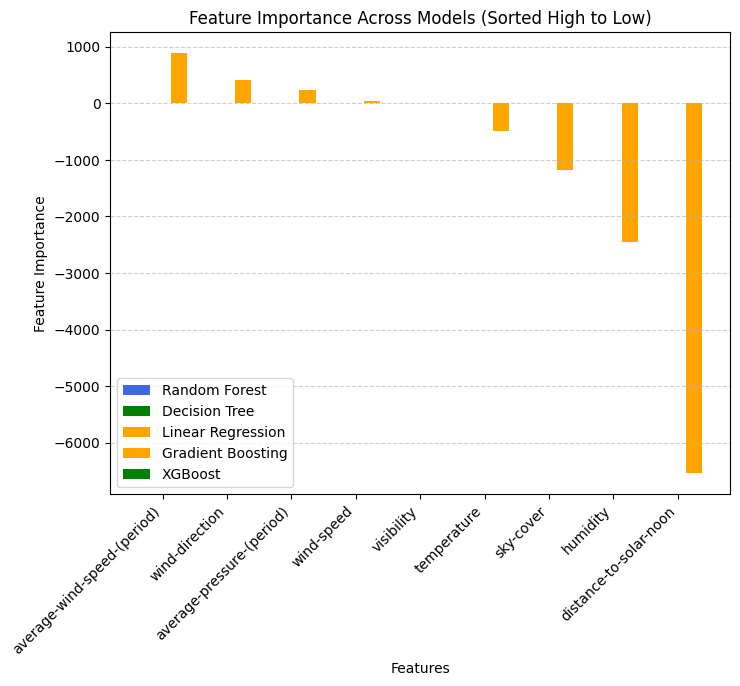

In [114]:
# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Random Forest": rf_feature_importances_,
    "Decision Tree": dt_model.feature_importances_,
    "Linear Regression": lr_model.coef_,
    "Gradient Boosting": gbr_feature_importances_,
    "XGBoost": xgbr.feature_importances_
})

# Sort features by average importance across models (high to low)
feature_importance["Average"] = feature_importance.iloc[:, 1:].mean(axis=1)
feature_importance = feature_importance.sort_values(by="Average", ascending=False).drop(columns=["Average"])

# Set figure size
plt.figure(figsize=(8, 6))

# Number of features
n_features = len(feature_importance)
bar_width = 0.25  # Width of each bar
x_indexes = np.arange(n_features)  # X positions

# Plot bars side by side
plt.bar(x_indexes, feature_importance["Random Forest"], width=bar_width, label="Random Forest", color='royalblue')
plt.bar(x_indexes + bar_width, feature_importance["Decision Tree"], width=bar_width, label="Decision Tree", color='green')
plt.bar(x_indexes + 2 * bar_width, feature_importance["Linear Regression"], width=bar_width, label="Linear Regression", color='orange')
plt.bar(x_indexes + bar_width, feature_importance["Gradient Boosting"], width=bar_width, label="Gradient Boosting", color='orange')
plt.bar(x_indexes + 2 * bar_width, feature_importance["XGBoost"], width=bar_width, label="XGBoost", color='green')

# Formatting
plt.xticks(ticks=x_indexes + bar_width, labels=feature_importance["Feature"], rotation=45, ha='right')
plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.title("Feature Importance Across Models (Sorted High to Low)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


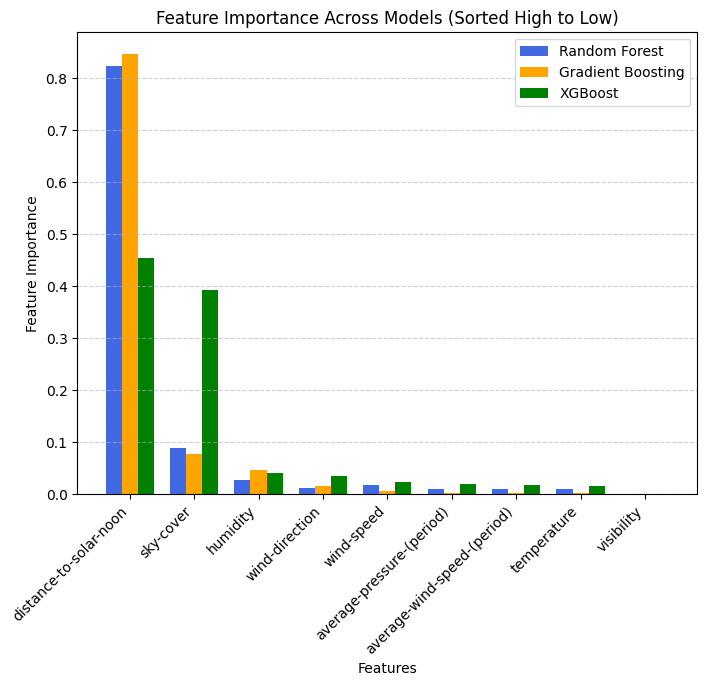

In [116]:
# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Random Forest": rf_feature_importances_,
    "Gradient Boosting": gbr_feature_importances_,
    "XGBoost": xgbr.feature_importances_
})

# Sort features by average importance across models (high to low)
feature_importance["Average"] = feature_importance.iloc[:, 1:].mean(axis=1)
feature_importance = feature_importance.sort_values(by="Average", ascending=False).drop(columns=["Average"])

# Set figure size
plt.figure(figsize=(8, 6))

# Number of features
n_features = len(feature_importance)
bar_width = 0.25  # Width of each bar
x_indexes = np.arange(n_features)  # X positions

# Plot bars side by side
plt.bar(x_indexes, feature_importance["Random Forest"], width=bar_width, label="Random Forest", color='royalblue')
plt.bar(x_indexes + bar_width, feature_importance["Gradient Boosting"], width=bar_width, label="Gradient Boosting", color='orange')
plt.bar(x_indexes + 2 * bar_width, feature_importance["XGBoost"], width=bar_width, label="XGBoost", color='green')

# Formatting
plt.xticks(ticks=x_indexes + bar_width, labels=feature_importance["Feature"], rotation=45, ha='right')
plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.title("Feature Importance Across Models (Sorted High to Low)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()

In [120]:
import pickle

# Save the model
with open('solar_power_generation_model.pkl', 'wb') as f:
    pickle.dump(xgbr, f)
# Save the Scalar Standardization
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [112]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [129]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model and scaler
model = joblib.load("solar_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Solar Power Generation Prediction")

st.sidebar.header("Input Features")
def user_input_features():
    temperature = st.sidebar.number_input("Temperature (°C)", value=25.0)
    humidity = st.sidebar.number_input("Humidity (%)", value=50.0)
    wind_speed = st.sidebar.number_input("Wind Speed (m/s)", value=5.0)
    irradiance = st.sidebar.number_input("Solar Irradiance (W/m²)", value=500.0)

    data = pd.DataFrame(
        {
            "Temperature": [temperature],
            "Humidity": [humidity],
            "Wind Speed": [wind_speed],
            "Solar Irradiance": [irradiance],
        }
    )
    return data

df = user_input_features()
st.write("### User Input Features:")
st.write(df)

df_scaled = scaler.transform(df)

if st.button("Predict Power Generation"):
    prediction = model.predict(df_scaled)
    st.success(f"Predicted Power Output: {prediction[0]:.2f} kW")


Writing app.py


In [130]:
!pip install pyngrok
from pyngrok import ngrok

# Set up ngrok tunnel (for public access)
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")  # Replace with your ngrok token


In [140]:
pip install streamlit


In [134]:
!streamlit run app.py &>/dev/null &


In [137]:
public_url = ngrok.connect(port="8501")
print(f"Streamlit app running at {public_url}")


ERROR:pyngrok.process.ngrok:t=2025-03-18T09:37:04+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_NGROK_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-18T09:37:04+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_NGROK_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-18T09:37:04+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: The authtoken you specified does not look like a pr

PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_NGROK_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n.

In [127]:
import streamlit as st
import pandas as pd
import pickle
import joblib

# Load the transformations and the trained model
with open('yj_wd.pkl', 'rb') as f:
    joblib.dump(yj_wd, f)

with open('yj_h.pkl', 'rb') as f:
    yj_h = joblib.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler_transformer = pickle.load(f)

with open('solar_power_generation_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Streamlit app
st.title('Solar Power Generation Predictor')

distance_to_solar_noon = st.number_input('Distance to Solar Noon(rad)')
temperature = st.number_input('Temperature(°C) - Daily Average')
sky_cover = st.selectbox('Sky Cover', [0, 1, 2, 3, 4])
wind_direction = st.number_input('Wind Direction(°) - Daily Average')
wind_speed = st.number_input('Wind Speed(m/s)')
average_wind_speed_period = st.number_input('Average Wind Speed(m/s) - 3 Hour Measurement')
humidity = st.number_input('Humidity(%)')
average_pressure_period = st.number_input('Average Pressure(inches of Hg) - 3 Hour Measurement')

data = {
    'sky_cover': [sky_cover],
    'distance_to_solar_noon': [distance_to_solar_noon],
    'temperature': [temperature],
    'wind_direction': [wind_direction],
    'wind_speed': [wind_speed],
    'average_wind_speed_period': [average_wind_speed_period],
    'humidity': [humidity],
    'average_pressure_period': [average_pressure_period],
}

input_data = pd.DataFrame(data,index=[0])

# Apply Yeo-Johnson transformation on 'wind_direction_yj', 'humidity_yj'
input_data[['wind_direction_yj']] = yj_wd.transform(input_data[['wind_direction']])
input_data[['humidity_yj']] = yj_h.transform(input_data[['humidity']])


# List of columns to apply scaler (excluding 'sky_cover')
scaled_features = ['distance_to_solar_noon', 'temperature', 'wind_speed',
       'average_wind_speed_period', 'average_pressure_period',
       'wind_direction_yj', 'humidity_yj']

# Apply scaling
input_data[scaled_features] = scaler_transformer.transform(input_data[scaled_features])

input_data = input_data.drop(['wind_direction','humidity'],axis=1)
# Predict
transformed_prediction = loaded_model.predict(input_data)  # Get transformed target prediction

# Show result
if st.button("Show Result"):
    st.subheader("Predicted Power Generated(J) - 3 Hour Measurement")
    st.write(f"**{transformed_prediction[0]:.2f}**")

NameError: name 'yj_wd' is not defined

In [ ]:
# ===========================
# Step 6: Save Best Model for Deployment
# ===========================

# Save the best model (Random Forest, if it performs better)
joblib.dump(rf_model, "solar_power_model.pkl")

print("\nModel saved successfully! You can use 'solar_power_model.pkl' for predictions.")


 Explanation of Each Step

# **Step 1: Load and Explore the Dataset**

Reads the dataset into a Pandas DataFrame.
Displays basic info, first five rows, and missing values.


# **Step 2: Exploratory Data Analysis (EDA)**

Shows statistical summary using .describe().

Plots the distribution of the target variable (power_generated).

Generates a correlation heatmap to identify important relationships.

# **Step 3: Data Preprocessing**

Defines X (independent variables) and y (target variable).

Splits the dataset into training (80%) and testing (20%) subsets.

Applies Standard Scaling to normalize feature values.

Saves the scaler (scaler.pkl) for deployment.

# **Step 4: Model Building**

Trains Linear Regression and Random Forest Regressor models and Decision Tree Models.

# **Step 5: Model Evaluation**

Predicts energy production on test data.

Calculates Mean Absolute Error (MAE), Mean Squared Error (MSE), RMSE, and R².

Compares the models’ performances.

# **Step 6: Model Saving for Deployment**

Saves the best-performing model as solar_power_model.pkl.

Explanation of the Flask API Code

# **Routes in the API**

/ (GET Request) – Home route to check if the API is running.

/predict (POST Request) – Accepts JSON input and returns the predicted energy production.

# **Steps in Prediction Process**

Receives JSON input containing environmental variables.

Converts JSON to a Pandas DataFrame.

Reorders columns to match the training data format.

Scales the input features using the saved scaler.pkl.

Feeds the scaled input into the trained Random Forest model (solar_power_model.pkl).

Returns the predicted power generation as a JSON response.

In [ ]:
# Save the transformer
with open('yj_wd.pkl', 'wb') as f:
    pickle.dump(yj_wd, f)

with open('yj_wd.pkl', 'wb') as f:
    pickle.dump(yj_wd, f)